# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_combo_df = pd.merge(study_results, right=mouse_metadata, how="outer", on="Mouse ID")

# Display the data table for preview
study_combo_df.head(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [3]:
# Checking the number of mice.
print(len(study_combo_df["Mouse ID"].unique()))

249


In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicated_mice_data = study_combo_df.loc[study_combo_df.duplicated(["Mouse ID", "Timepoint"], keep=False), :]
duplicated_mice_ID = duplicated_mice_data["Mouse ID"].unique()
duplicated_mice_ID


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
study_combo_df.loc[study_combo_df["Mouse ID"].isin(duplicated_mice_ID)]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_clean_df = study_combo_df.loc[~study_combo_df["Mouse ID"].isin(duplicated_mice_ID)]
study_clean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
print(len(study_clean_df["Mouse ID"].unique()))

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

# Select the tumor volume column and treatment regimen the sanitized dataset and group by treatment regimen
tumor_size_groupby_drug = study_clean_df.loc[:, ["Tumor Volume (mm3)", "Drug Regimen"]].groupby("Drug Regimen")

# use the pandas dataframe functions to calculate the required descriptive statistics
regimen_mean = tumor_size_groupby_drug.mean().rename(columns={"Tumor Volume (mm3)": "Mean Tumor Volume"})
regimen_median = tumor_size_groupby_drug.median().rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume"})
regimen_variance = tumor_size_groupby_drug.var().rename(columns={"Tumor Volume (mm3)": "Tumor Volume Variance"})
regimen_std = tumor_size_groupby_drug.std().rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Dev."})
regimen_stEr = tumor_size_groupby_drug.sem().rename(columns={"Tumor Volume (mm3)": "Tumor Volume Std. Err."})

# Assemble the resulting series into a single summary DataFrame.
regimen_summary = pd.concat([regimen_mean, 
                             regimen_median, 
                             regimen_variance,
                             regimen_std,
                             regimen_stEr
                             ], axis='columns')
regimen_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

regimen_summary_succinct = tumor_size_groupby_drug.agg(['mean', 'median', 'var', 'std', 'sem'])
regimen_summary_succinct

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

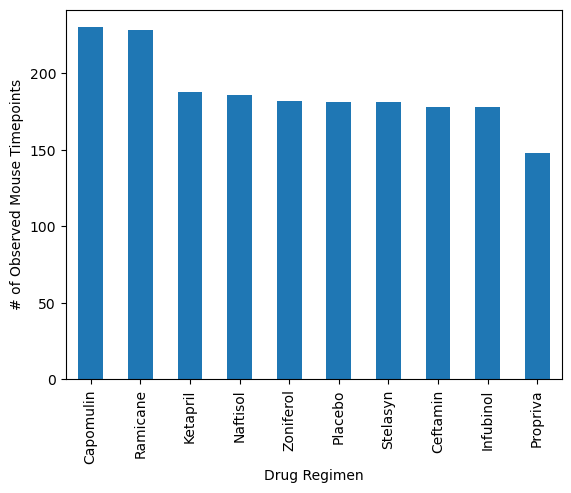

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

timepoints_groupby_drug = study_clean_df.loc[:, ["Timepoint", "Drug Regimen"]].groupby("Drug Regimen").count().sort_values(by="Timepoint", ascending=False)
ax_bar_pd = timepoints_groupby_drug.plot.bar(legend=False)
ax_bar_pd.set_ylabel("# of Observed Mouse Timepoints");

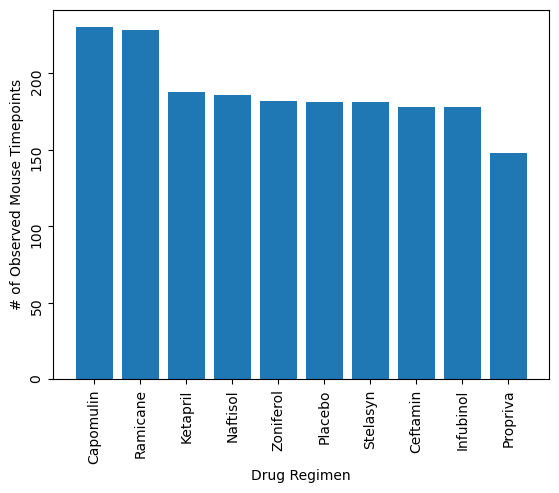

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

fig_bar, ax_bar_plt = plt.subplots()
ax_bar_plt.bar(timepoints_groupby_drug.index, timepoints_groupby_drug["Timepoint"])
ax_bar_plt.set_xlabel("Drug Regimen"); ax_bar_plt.set_ylabel('# of Observed Mouse Timepoints')
ax_bar_plt.tick_params(rotation=90)


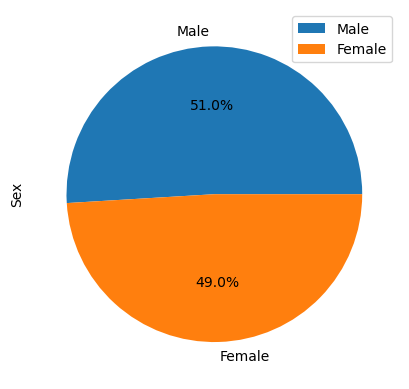

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mice_by_gender = study_clean_df.loc[:, ["Mouse ID", "Sex"]].groupby("Sex").count().sort_values(by='Mouse ID', ascending=False)
ax_pie_pd = mice_by_gender.plot.pie(y='Mouse ID', autopct='%1.1f%%', label='Sex')

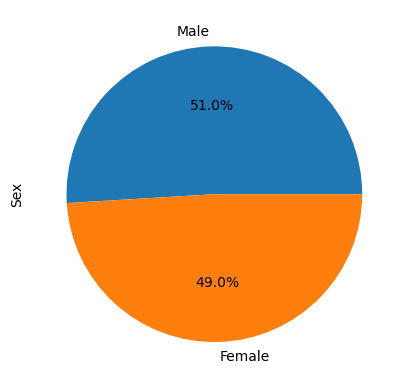

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mice_by_gender["Mouse ID"], labels=mice_by_gender.index, autopct='%1.1f%%')
plt.ylabel("Sex");

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timePoints = study_clean_df.loc[:, ["Mouse ID", "Timepoint"]].groupby("Mouse ID", as_index=False).max()

# below code is inspired by https://stackoverflow.com/questions/33282119/pandas-filter-dataframe-by-another-dataframe-by-row-elements

# create list of keys to filter by
keys_for_MI = list(greatest_timePoints.columns.values)

# create multi-index dataframes using the "Mouse ID" and "Timepoint" 
i1 = study_clean_df.set_index(keys_for_MI).index
i2 = greatest_timePoints.set_index(keys_for_MI).index

# use the isin function to select only the greatest timepoints
study_greatest_timepoints = study_clean_df[i1.isin(i2)]
study_greatest_timepoints.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
9,b128,45,38.982878,2,Capomulin,Female,9,22
10,f932,0,45.000000,0,Ketapril,Male,15,29
18,g107,35,71.905117,0,Ketapril,Female,2,29
21,a457,10,49.783419,0,Ketapril,Female,11,30
30,c819,40,62.175705,1,Ketapril,Male,21,25


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
tx_list = study_greatest_timepoints["Drug Regimen"].unique()

# Create empty dictionary to fill with tumor vol data (for plotting)
tumor_vol_data = {}
for drug in tx_list:
    tumor_sizes = study_greatest_timepoints.loc[study_greatest_timepoints["Drug Regimen"] == drug, "Tumor Volume (mm3)"].values
    tumor_vol_data[drug] = tumor_sizes

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
def find_outliers(array):
    """
    This will return the potential outliers for a given input array
    Function inspired by https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/#:~:text=Using%20the%20IQR%2C%20the%20outlier,Q1%20(Q3–Q1).&text=Notice%20using%20.,can%20define%20Q1%20and%20Q3.
    
    Input:
    array: dtype list or np.array with integers/floats

    Output: list of potential outliers
    """
    # convert array into pandas Series
    pd_series = pd.Series(array)
    # calculate the interquartile range (iqr)
    q1 = pd_series.quantile(0.25)
    q3 = pd_series.quantile(0.75)
    iqr = q3-q1
    # calculate the limits for potential outliers
    upper_lim = q3 + iqr * 1.5
    lower_lim = q1 - iqr * 1.5
    # use the upper & lower limits to calculate potential outliers
    outliers = pd_series[(pd_series < lower_lim) | (pd_series > upper_lim)].values
    return outliers

# iterate through different drug tx and print the potential outliers
for drug in tumor_vol_data:
    drug_outliers = find_outliers(tumor_vol_data[drug])
    print(f"{drug} has potential outliers: {drug_outliers}")


Capomulin has potential outliers: []
Ketapril has potential outliers: []
Naftisol has potential outliers: []
Infubinol has potential outliers: [36.3213458]
Stelasyn has potential outliers: []
Ramicane has potential outliers: []
Zoniferol has potential outliers: []
Propriva has potential outliers: []
Placebo has potential outliers: []
Ceftamin has potential outliers: []


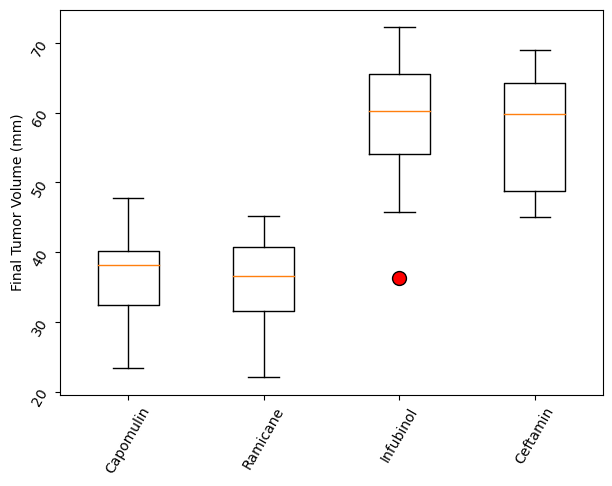

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# create a list of lists that contains all the tumor volume data from the tumor_vol_data dictionary
drugs_selected = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_vol_data_list = [tumor_vol_data[drug] for drug in drugs_selected]

# create a dictionary of outlier properties for plotting
flierprops = dict(marker='o', markerfacecolor='red', markersize=10,
                  linestyle='none')

# plot selected treatments in boxplots
fig_bp, ax_bp = plt.subplots()
ax_bp.boxplot(tumor_vol_data_list, labels=drugs_selected, flierprops=flierprops);
ax_bp.tick_params(rotation=60)
ax_bp.set_ylabel("Final Tumor Volume (mm)");
fig_bp.set_size_inches(7,5)


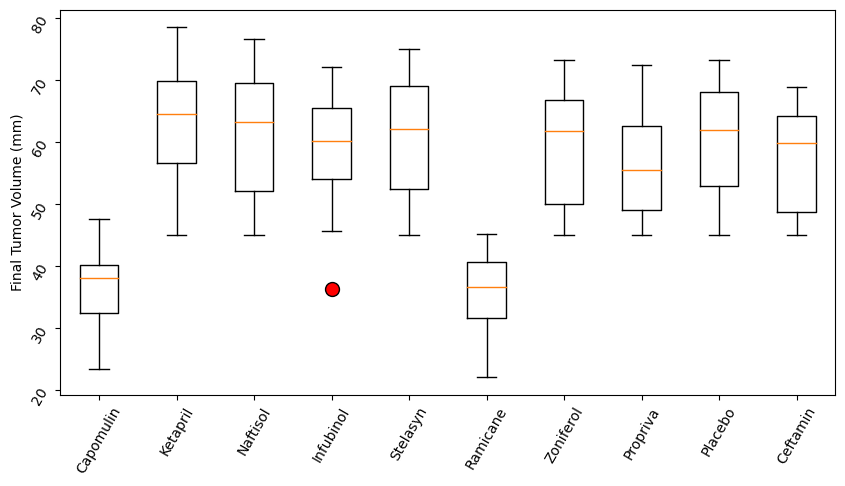

In [20]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# create a list of lists that contains all the tumor volume data from the tumor_vol_data dictionary
tumor_vol_data_list_all = [tumor_vol_data[drug] for drug in tumor_vol_data]

# plot all treatments in boxplots
fig_bp_all, ax_bp_all = plt.subplots()
ax_bp_all.boxplot(tumor_vol_data_list_all, labels=tx_list, flierprops=flierprops);
ax_bp_all.tick_params(rotation=60)
ax_bp_all.set_ylabel("Final Tumor Volume (mm)");
fig_bp_all.set_size_inches(10,5)

## Line and Scatter Plots

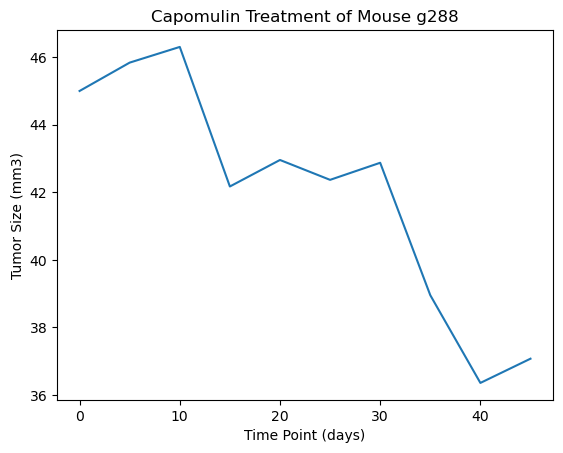

In [21]:
import numpy as np
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# generate list of mice that use Capomulin and have a time last timepoint of 45
capo_candidates = study_clean_df.loc[(study_clean_df["Drug Regimen"] == "Capomulin") & (study_clean_df["Timepoint"] == 45), "Mouse ID"].values

# randomly choose mouse from capo_candidates and store data
random_capo_mouse_ID = np.random.choice(capo_candidates)
capo_mouse_data = study_clean_df.loc[study_clean_df["Mouse ID"] == random_capo_mouse_ID]

# line plot tumor volume vs time point
fig_capo_mouse, ax_capo_mouse = plt.subplots()
ax_capo_mouse.plot(capo_mouse_data["Timepoint"], capo_mouse_data["Tumor Volume (mm3)"]);
ax_capo_mouse.set_xlabel("Time Point (days)")
ax_capo_mouse.set_ylabel("Tumor Size (mm3)")
ax_capo_mouse.set_title(f"Capomulin Treatment of Mouse {random_capo_mouse_ID}");

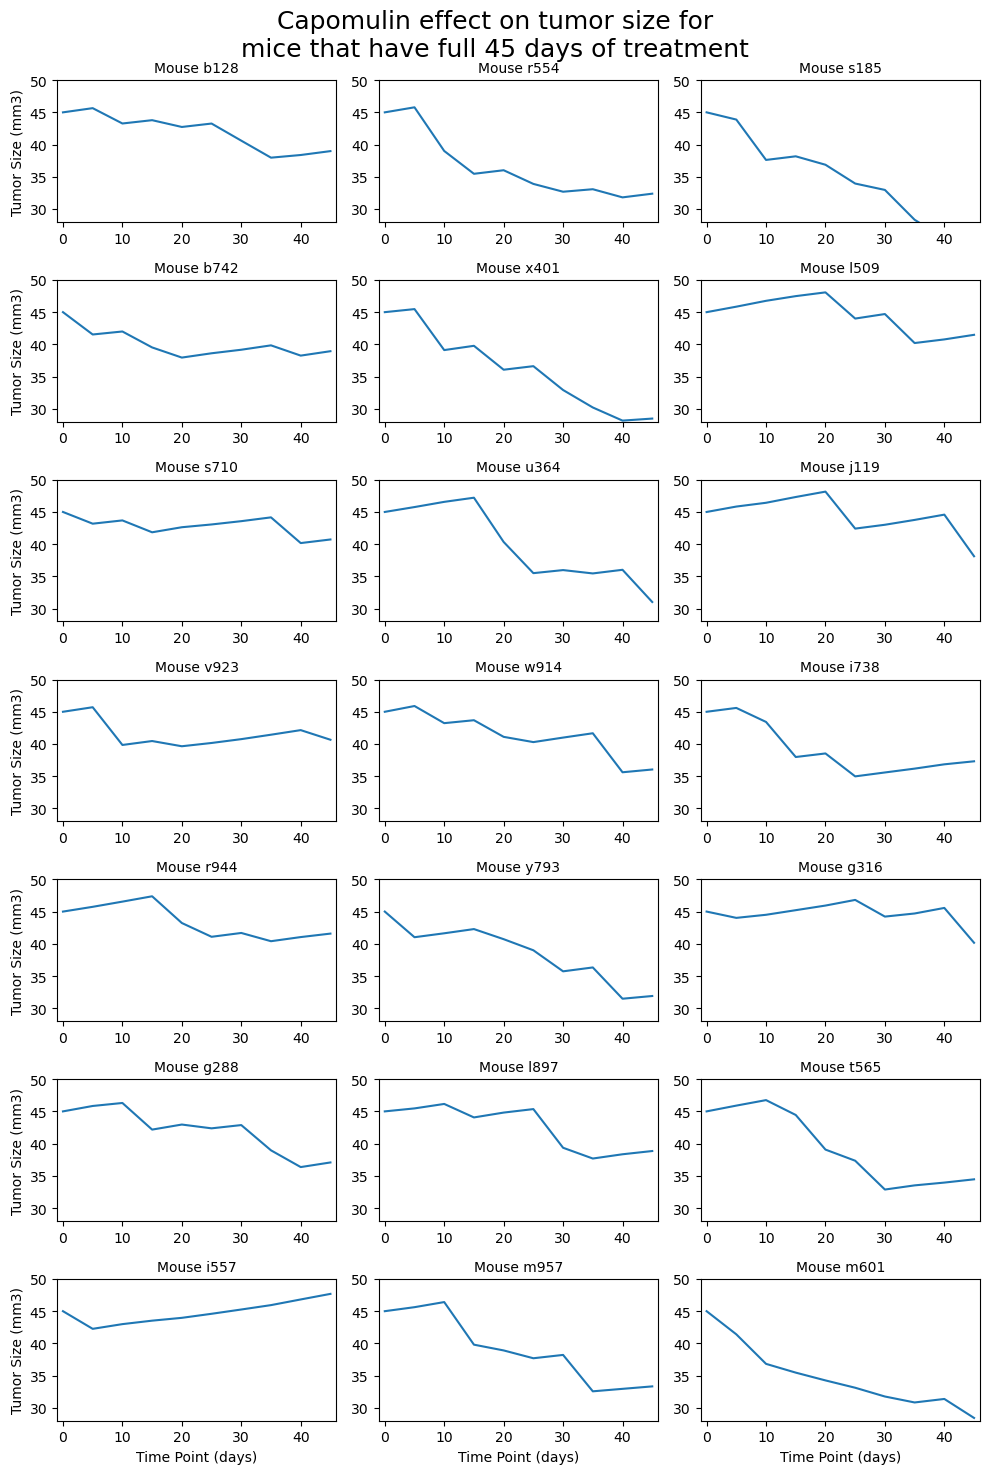

In [22]:
# display and plot tumor volume all mice that completed 45 days of Capomulin tx
num_capo_mice = len(capo_candidates) # number of mice

#plot
fig_capo_mice, axs_capo = plt.subplots(int(num_capo_mice/3), 3)
for row in range(int(num_capo_mice/3)):
    for column in range(3):
        mice_index = row*3 + column
        mouse_ID = capo_candidates[mice_index]
        capo_mouse = study_clean_df.loc[study_clean_df["Mouse ID"] == mouse_ID]

        axs_capo[row, column].plot(capo_mouse["Timepoint"], capo_mouse["Tumor Volume (mm3)"])
        axs_capo[row, column].set_ylim(28, 50)
        axs_capo[row, column].set_xlim(-1, 46)
        if column == 0:
            axs_capo[row, column].set_ylabel("Tumor Size (mm3)")
        if row == int(num_capo_mice/3) - 1:
            axs_capo[row, column].set_xlabel("Time Point (days)")
        
        axs_capo[row, column].set_title(f"Mouse {mouse_ID}", fontsize='medium');
fig_capo_mice.set_size_inches(10, 15)
fig_capo_mice.suptitle("Capomulin effect on tumor size for\nmice that have full 45 days of treatment", fontsize=18)
fig_capo_mice.tight_layout()


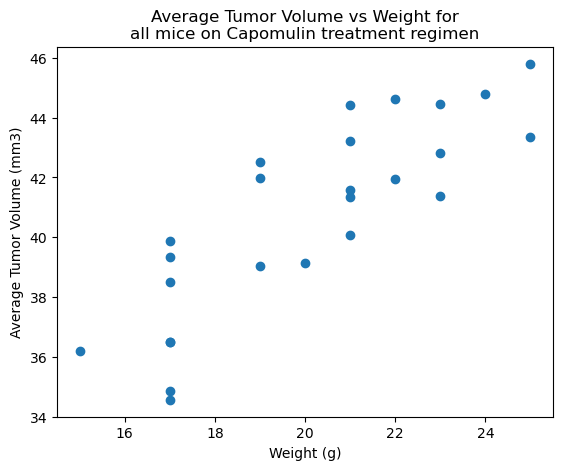

In [24]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# select only mice thate have Capomulin and group by the mouse
all_capo_mice = study_clean_df.loc[study_clean_df["Drug Regimen"] == "Capomulin"].groupby("Mouse ID")

# plot
fig_all_capo, ax_all_capo = plt.subplots()
ax_all_capo.scatter(all_capo_mice["Weight (g)"].first(), all_capo_mice["Tumor Volume (mm3)"].mean())
ax_all_capo.set_xlabel("Weight (g)")
ax_all_capo.set_ylabel("Average Tumor Volume (mm3)")
ax_all_capo.set_title("Average Tumor Volume vs Weight for\nall mice on Capomulin treatment regimen");


## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume for mice is 0.84


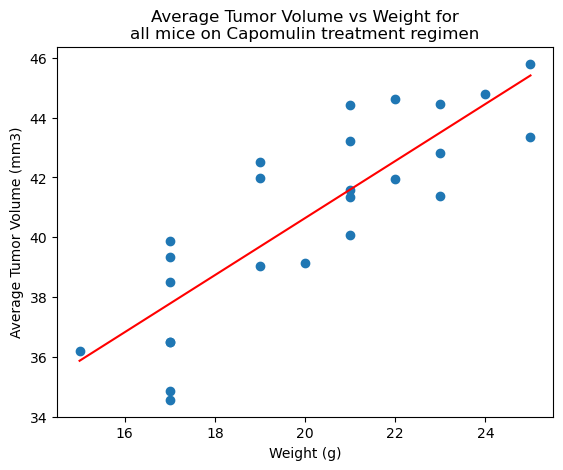

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# use scipy.stats lingress function to make a linear regression model
lsr_cap = st.linregress(all_capo_mice["Weight (g)"].first(), all_capo_mice["Tumor Volume (mm3)"].mean())

# create the regression line
x_regress = np.linspace(all_capo_mice["Weight (g)"].first().min(), all_capo_mice["Weight (g)"].first().max(), 10)
y = lsr_cap.slope * x_regress + lsr_cap.intercept

print(f"The correlation coefficient between mouse weight and the average tumor volume for mice is {lsr_cap.rvalue:.2f}")
ax_all_capo.plot(x_regress, y, c='red') 
fig_all_capo
